In [1]:
import pandas as pd
import pickle
import numpy as np
import h5py
from ast_models_original import ASTModel
%matplotlib inline
import subprocess
import pickle
import socket
import matplotlib.pyplot as plt

In [2]:
curr_node = socket.gethostname().split('.')[0]
batcmd=f"squeue -u billyli | grep {curr_node}"
curr_slurm = subprocess.check_output(batcmd, shell=True, text=True)
slurm_id = curr_slurm.strip().split(' ')[0]
print(slurm_id)

8635173


# 64x400 Feature

In [3]:
temp_hash_ids = np.concatenate(pickle.load(open(f'/local/slurm-{slurm_id}/local/audio/file_seq_64_400.pkl','rb')))
print(temp_hash_ids)
hash_ids = []
for item in temp_hash_ids:
    hash_ids.append(item.split('/')[-1][:-4])
print(len(hash_ids))

['/local/slurm-7786243/local/audio/eval_wav/--4gqARaEJE.wav'
 '/local/slurm-7786243/local/audio/eval_wav/--BfvyPmVMo.wav'
 '/local/slurm-7786243/local/audio/eval_wav/--U7joUcTCo.wav' ...
 '/local/slurm-7786243/local/audio/eval_wav/zzD_oVgzKMc.wav'
 '/local/slurm-7786243/local/audio/eval_wav/zzNdwF40ID8.wav'
 '/local/slurm-7786243/local/audio/eval_wav/zzbTaK7CXJY.wav']
20123


In [4]:
print(hash_ids[1])

--BfvyPmVMo


In [127]:
hf_val_eval = h5py.File(f'/local/slurm-{slurm_id}/local/audio/data_64_400_again.h5', 'r')
feat_a = hf_val_eval['feat_a'][:]
labels = hf_val_eval['labels'][:]

# 128x1024 Feature

In [ ]:
temp_hash_ids = np.concatenate(pickle.load(open(f'/local/slurm-{slurm_id}/local/audio/file_seq_128_1024.pkl','rb')))
print(temp_hash_ids)
hash_ids = []
for item in temp_hash_ids:
    hash_ids.append(item.split('/')[-1][:-4])

In [126]:
hf_val_eval = h5py.File(f'/local/slurm-{slurm_id}/local/audio/data_128_1024_again.h5', 'r')
feat_a = hf_val_eval['feat_a'][:]
labels = hf_val_eval['labels'][:]

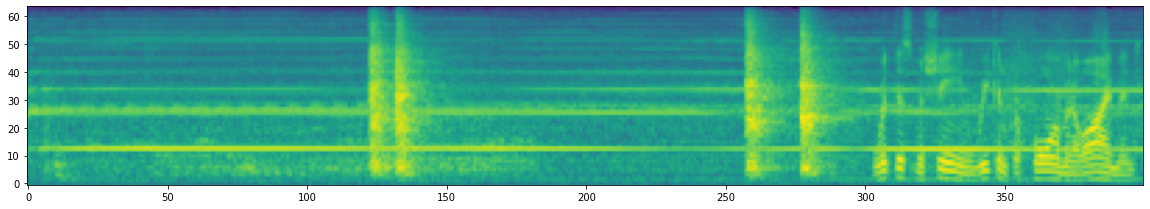

In [128]:
plt.figure(figsize = (20,10))
plt.imshow(feat_a[1].T, origin='lower')
plt.savefig('imgs/hammer_strong.png')

In [7]:
print(feat_a.shape)

(20123, 400, 64)


##### Label

In [8]:
for label in labels:
    print(np.nonzero(label))

(array([ 72,  73,  74, 361]),)
(array([419]),)
(array([47]),)
(array([  0,  33,  34, 137]),)
(array([17, 20, 21]),)
(array([  0,  53, 137]),)
(array([137, 268, 273]),)
(array([307, 379]),)
(array([137, 268]),)
(array([  0,  72,  87,  89, 137]),)
(array([364]),)
(array([  0, 433]),)
(array([ 62, 137]),)
(array([ 57, 137]),)
(array([  0, 299]),)
(array([111, 509, 520]),)
(array([ 72,  73, 288, 372, 451, 452, 454]),)
(array([  0,  61, 370, 371, 506]),)
(array([137, 525]),)
(array([  0,   2, 481]),)
(array([137, 525]),)
(array([469]),)
(array([137, 176]),)
(array([  0, 135, 137]),)
(array([ 0, 65]),)
(array([288, 374]),)
(array([343, 350, 352]),)
(array([ 0, 50]),)
(array([426]),)
(array([347]),)
(array([525]),)
(array([  0, 137, 139, 140, 143, 145, 146]),)
(array([300, 316, 319]),)
(array([  0,  94, 137]),)
(array([286, 287, 289, 291]),)
(array([ 0, 71]),)
(array([  0, 389, 506]),)
(array([137, 138, 183]),)
(array([343, 351]),)
(array([275]),)
(array([296, 403]),)
(array([283, 285, 301, 3

In [9]:
print(labels[0].nonzero()[0].tolist())

[72, 73, 74, 361]


In [10]:
strong_labels = pd.read_csv('./audioset_strong_label/audioset_eval_strong.tsv', sep='\t')

In [11]:
feat_a.shape, labels.shape

((20123, 400, 64), (20123, 527))

In [12]:
strong_labels 

,segment_id,start_time_seconds,end_time_seconds,label
0,s9d-2nhuJCQ_30000,0.000,10.000,/m/04rlf
1,s9d-2nhuJCQ_30000,2.627,7.237,/m/053hz1
2,s9d-2nhuJCQ_30000,2.627,9.239,/m/03qtwd
3,s9d-2nhuJCQ_30000,5.634,6.649,/m/01w250
4,s9d-2nhuJCQ_30000,7.201,8.560,/m/0l15bq
...,...,...,...,...
139533,skwl9axYSIE_400000,0.213,2.984,/m/05zppz
139534,skwl9axYSIE_400000,3.354,4.181,/m/05zppz
139535,skwl9axYSIE_400000,4.496,5.819,/m/05zppz
139536,skwl9axYSIE_400000,8.559,8.898,/m/07pggtn


In [13]:
class_label = pd.read_csv('./audioset_strong_label/class_labels_indices.csv', sep=',')

In [14]:
class_label[['mid','index','display_name']]

,mid,index,display_name
0,/m/09x0r,0,Speech
1,/m/05zppz,1,"Male speech, man speaking"
2,/m/02zsn,2,"Female speech, woman speaking"
3,/m/0ytgt,3,"Child speech, kid speaking"
4,/m/01h8n0,4,Conversation
...,...,...,...
522,/m/07p_0gm,522,Throbbing
523,/m/01jwx6,523,Vibration
524,/m/07c52,524,Television
525,/m/06bz3,525,Radio


In [15]:
# class_label.loc[523].at["display_name"]
class_label['mid'].values

array(['/m/09x0r', '/m/05zppz', '/m/02zsn', '/m/0ytgt', '/m/01h8n0',
       '/m/02qldy', '/m/0261r1', '/m/0brhx', '/m/07p6fty', '/m/07q4ntr',
       '/m/07rwj3x', '/m/07sr1lc', '/m/04gy_2', '/t/dd00135',
       '/m/03qc9zr', '/m/02rtxlg', '/m/01j3sz', '/t/dd00001',
       '/m/07r660_', '/m/07s04w4', '/m/07sq110', '/m/07rgt08',
       '/m/0463cq4', '/t/dd00002', '/m/07qz6j3', '/m/07qw_06',
       '/m/07plz5l', '/m/015lz1', '/m/0l14jd', '/m/01swy6', '/m/02bk07',
       '/m/01c194', '/t/dd00003', '/t/dd00004', '/t/dd00005',
       '/t/dd00006', '/m/06bxc', '/m/02fxyj', '/m/07s2xch', '/m/07r4k75',
       '/m/01w250', '/m/0lyf6', '/m/07mzm6', '/m/01d3sd', '/m/07s0dtb',
       '/m/07pyy8b', '/m/07q0yl5', '/m/01b_21', '/m/0dl9sf8', '/m/01hsr_',
       '/m/07ppn3j', '/m/06h7j', '/m/07qv_x_', '/m/07pbtc8', '/m/03cczk',
       '/m/07pdhp0', '/m/0939n_', '/m/01g90h', '/m/03q5_w', '/m/02p3nc',
       '/m/02_nn', '/m/0k65p', '/m/025_jnm', '/m/0l15bq', '/m/01jg02',
       '/m/01jg1z', '/m/053hz1', '

In [16]:
print(class_label[class_label["mid"] == '/m/01jwx6']['index'].values[0])

523


In [17]:
np.min(feat_a)

-100.0

In [ ]:
modified_ind = set()
for i, row in strong_labels.iterrows():
    filename = row['segment_id'][:11]
    start_time = int(row['start_time_seconds']/10.0 * 400)
    end_time = int(row['end_time_seconds']/10.0 * 400)
    label_mid = row['label']
    if label_mid not in class_label['mid'].values: #9 classes of MID does not exist in previous AudioSet version
        continue
    label_ind = class_label[class_label["mid"] == label_mid]['index'].values[0]#get label_ind from class_label translation
#     print(filename, label_mid, label_ind)
    if filename in hash_ids:
        ind = hash_ids.index(filename)
        silence_val = np.min(feat_a[ind])
        label_lst = labels[ind].nonzero()[0].tolist()
        if label_ind in label_lst:
#             print(label_ind, label_lst)
            feat_a[ind,start_time:end_time,:] = silence_val
            modified_ind.add(ind)

In [21]:
from collections import defaultdict
count = 0
new_mid_count=0
exist_mid_count = 0
missing_count = 0
unique_files = set()
missing_mids= set()
wrong_mid_files = set()
exist_mid_files = set()
available_in_hash = set()
test_set = defaultdict(list)
missing_test_set = defaultdict(list)
missing_set = set()
cnt_testset, cnt_mislabel_testset = 0, 0
for i, row in strong_labels.iterrows():
    filename = row['segment_id'][:11] #cannot use split since filename contains "_", made the mistake, lost 20000 files shit!
    unique_files.add(filename)
    start_time = int(row['start_time_seconds']/10.0 * 400)
    end_time = int(row['end_time_seconds']/10.0 * 400)
    label_mid = row['label']
    #6555 record missing
    if label_mid not in class_label['mid'].values: #9 classes of MID does not exist in previous AudioSet version
#         print(label_mid, filename)
        missing_mids.add(label_mid)
        wrong_mid_files.add(filename)
        new_mid_count+=1
        continue
    else:
        #16983 files
        exist_mid_files.add(filename)
        exist_mid_count += 1
        label_ind = class_label[class_label["mid"] == label_mid]['index'].values[0]
    #     print(filename, label_mid, label_ind)
        if filename in hash_ids:
            available_in_hash.add(filename)
            #132551 record
            #16919 files
            count += 1
            ind = hash_ids.index(filename)
#             silence_val = np.min(feat_a[ind]) # this step costs most time
            label_lst = labels[ind].nonzero()[0].tolist()
            if label_ind in label_lst:
    #             print(label_ind, label_lst)
    #             feat_a[ind,start_time:end_time,:] = silence_val
                cnt_testset+=1
                test_set[ind].append((start_time, end_time))
            else:
                cnt_mislabel_testset+=1
                missing_test_set[ind].append((label_ind, label_lst))
        #432 record
        #64 files
        else:
            missing_count += 1
            missing_set.add(filename)
    #         print(filename)

In [22]:
print(len(exist_mid_files))

16983


In [23]:
print("unique #files: ", len(unique_files))
print("missing_mids: ", len(missing_mids))
print("missing mids files: ", len(wrong_mid_files))
print("exist mid files: ", len(exist_mid_files))
print("not in eval set: ", len(missing_set))
print(len(test_set))
print('count:',count)
print('missing_count:', missing_count)
print('exist_mid_count:',exist_mid_count)
print('new_mid_count:', new_mid_count)
print('available in hash: ', len(available_in_hash))
print(cnt_testset,cnt_mislabel_testset )

unique #files:  16996
missing_mids:  35
missing mids files:  2575
exist mid files:  16983
not in eval set:  64
12091
count: 132551
missing_count: 432
exist_mid_count: 132983
new_mid_count: 6555
available in hash:  16919
36909 95642


In [24]:
print(len(test_set))
# This shows many new labels are not matching the orginal labels.

12091


### Code for masking strong lables 

In [105]:
n_mel = 64
for key in test_set:
#     print(key, test_set[key])
    record = feat_a[key]
    silence_val = np.min(record)
    record = np.ma.array(record, mask=True)
    for interval in test_set[key]: 
        start, end = interval
        for i in range(start, end):
            record.mask[i] = False
    feat_a[key]= record.filled(fill_value=silence_val)
#         feat_a[key,start:end,:] = silence_val

### Code for concatenating masked strong lables 

In [129]:
n_mel = 64
for key in test_set:
#     print(key, test_set[key])
    record = feat_a[key]
    silence_val = np.min(record)
    record = np.ma.array(record, mask=False)
    for interval in test_set[key]: 
        start, end = interval
        for i in range(start, end):
            record.mask[i] = True
    mask_record = record.compressed().reshape(-1,n_mel)
    fill_matrix = np.full((400-mask_record.shape[0],n_mel), silence_val)
    mask_record = np.vstack((mask_record, fill_matrix))
    feat_a[key] = mask_record
#     feat_a[key]= record.filled(fill_value=silence_val)
#         feat_a[key,start:end,:] = silence_val

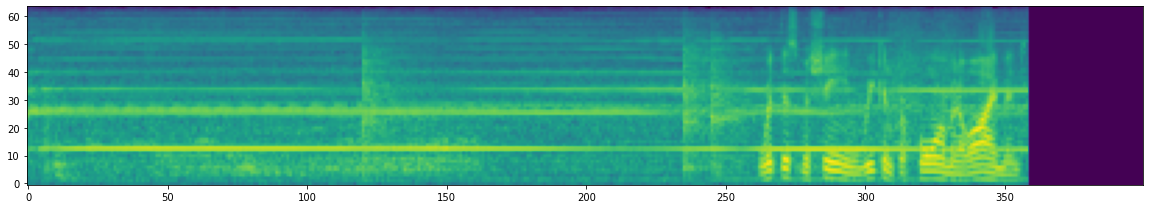

In [130]:
plt.figure(figsize = (20,10))
plt.imshow(feat_a[1].T, origin='lower')
plt.savefig('imgs/hammer_strong.png')

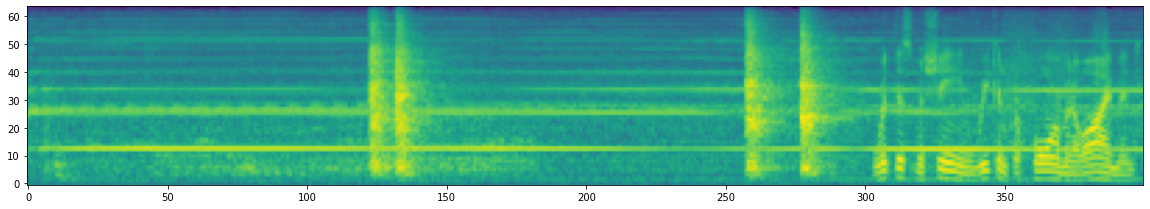

In [114]:
plt.figure(figsize = (20,10))
plt.imshow(feat_a[1].T, origin='lower')
plt.savefig('imgs/hammer_strong.png')

In [28]:
ind = hash_ids.index('s9d-2nhuJCQ')
label_lst = labels[ind].nonzero()[0].tolist()
print(label_lst)

[161, 162, 164, 165, 166, 167, 168]


In [29]:
print(missing_mids)

{'/t/dd00141', '/m/01sb50', '/t/dd00139', '/m/0641k', '/m/0174k2', '/m/0dgw9r', '/m/018p4k', '/m/0d4wf', '/t/dd00138', '/m/0hgq8df', '/m/0c1tlg', '/m/0fw86', '/m/07sk0jz', '/m/09l8g', '/t/dd00133', '/m/02f9f_', '/m/09hlz4', '/t/dd00091', '/t/dd00143', '/m/0zmy2j9', '/m/02021', '/m/093_4n', '/m/01j423', '/t/dd00098', '/m/01lynh', '/m/07q8f3b', '/m/01j3j8', '/m/0bcdqg', '/m/05mxj0q', '/t/dd00142', '/m/0md09', '/t/dd00099', '/m/0bzvm2', '/t/dd00109', '/t/dd00061'}


In [30]:
print(missing_set)

{'keIvA2wSPZc', 'HLsRePLObfI', 'MC_xbXx2xT4', 'sPwhr-5HPb0', 'qWIzaRz4nxM', 'SSXX0M9_LXU', '-lci0RRFlkA', 'VxYQ_7maGQg', 'mU3BktTVq9Q', 'vpWSYzKPqe4', 'iuNpXisjsLY', 'gIfDs4TQ4bM', 'WaFUS4HVpGg', 'Lwl8xZ_zNDE', 'RAucmy-5bj4', 'DsAp3b1poeA', '3YzCyEJ_hvg', '1On2yNySbZ0', 'nSinUcyFFqg', 'g6qq3GHA9t0', 'h_eORUfIBDs', 'dMYdju0ICyU', 'o8MgI-_bwoE', 'vQHKa69Mkzo', 'aHo7q32Hwls', 'Kac8qiE-yAc', 'I4Rhe1XViYg', '4aRMZ4ePmMM', 'UNJswfXKJ3s', 'tGic59TlrVg', 'bHCDa337kzI', 'zOSBpJV5Ipk', '16vy6Lz8tkY', 'WtQ_kNsOQMU', 'l6eWoKOAylA', 'p85b0fQ7r48', 'mjOEc2zIjnk', '7Pj4ENryUkQ', 'VrljAMqy9dA', 'UtCRBs5p4EQ', 'M_s-49rNCdw', 'ml07DEX7png', 'PFBFrLt00GA', 'FsCQmTluSDw', '-Z8bjo6q6jc', 'Js_3Aa214xY', 'XIKsBPAS2vQ', 'HJP1RzqxkHw', '3QVNpLUQsAk', 'zJrQiK-0-6E', 'AoUn8I-RtRk', '6eISPP6zuNE', 'tEr5IX_zTC0', 'LP1yZRsRllQ', 'a9M70D-MRN0', '-tpq_bzSKes', 'VUIQZEC_VFo', 'cGzNyfp3mW4', '-HKAgW-vzSI', 'd5fL-jgNVsM', 'IMTv4Ym0p6A', 'oRVivXC83hA', 'NTyKi3QGd4k', 'AlhgZaR30A0'}


In [31]:
print("ml07DEX7png" in hash_ids)

False


In [32]:
print(len(hash_ids))

20123


In [131]:
i = 0
subset_feat = np.empty((len(test_set), 400,64))
subset_label = np.empty((len(test_set),527))
subset_hashes = []
for ind, feat in enumerate(feat_a):
    if ind in test_set:
#         print(ind, i, np.mean(feat_a[ind]))
        subset_feat[i] = feat_a[ind][:]
        subset_label[i] = labels[ind][:]
        subset_hashes.append(hash_ids[ind].encode('utf-8'))
        i+=1
#         print(i)
#     if ind == 1:
#         print(ind, feat)
#         print(np.min(feat), np.max(feat))
#         plt.figure(figsize = (20,10))
#         plt.imshow(feat_a[ind].T, origin='lower')
#         plt.savefig('imgs/hammer_strong.png')
#         break

In [95]:
print(i)

12091


In [42]:
print(subset_hashes[2])

b'--U7joUcTCo'


In [44]:
print(subset_feat.shape)

(12091, 400, 64)


In [45]:
print(subset_label.shape)

(12091, 527)


## Create subset dataset

In [132]:
dtype = h5py.special_dtype(vlen=str)
hf_val_eval = h5py.File('./data_64_400_strong_c_masked_concat_subset.h5', 'w')
hf_val_eval.create_dataset('feat_a', data=subset_feat)
hf_val_eval.create_dataset('hashes', data=np.array(subset_hashes))
hf_val_eval.create_dataset('labels', data=subset_label)
hf_val_eval.close()

## Create Full dataset

In [55]:
hf_val_eval = h5py.File('./data_64_400_strong_corrected.h5', 'w')
hf_val_eval.create_dataset('feat_a', data=feat_a)
hf_val_eval.create_dataset('modified_ind', data=np.array(list(modified_ind)))
hf_val_eval.create_dataset('labels', data=labels)
hf_val_eval.close()

# Load dataset to test

In [133]:
hf_val_eval_path ='./data_64_400_strong_c_masked_concat_subset.h5'
def bulk_load2(file_path, mu, sigma):
    hf_val_eval = h5py.File(file_path, 'r')
    feat_a = (hf_val_eval['feat_a'][:]*2-mu)/(2 * sigma)
    labels = hf_val_eval['labels'][:]
    hashes = hf_val_eval['hashes'][:]
    hf_val_eval.close()
    return feat_a.astype('float32'), labels.astype('bool'), hashes
mu_val=-29.072655
sigma_val=40.71728
gas_eval_x1, gas_eval_y, gas_eval_hash= bulk_load2(hf_val_eval_path, mu_val, sigma_val)

In [134]:
print(gas_eval_x1.shape, gas_eval_y.shape, gas_eval_hash.shape)

(12091, 400, 64) (12091, 527) (12091,)


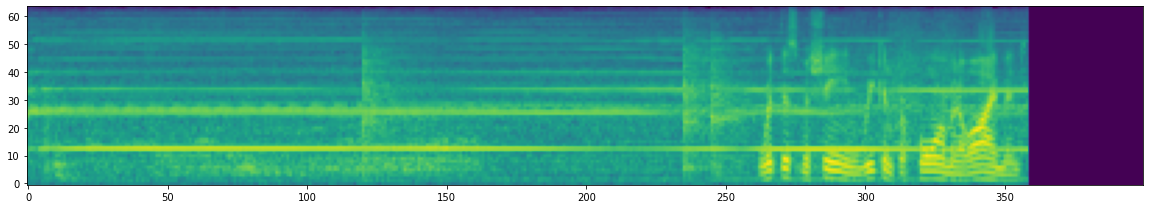

In [135]:
plt.figure(figsize = (20,10))
plt.imshow(gas_eval_x1[1].T, origin='lower')
# plt.savefig('imgs/hammer_strong.png')

In [136]:
print(gas_eval_y[1].nonzero())

(array([419]),)


In [101]:
print(gas_eval_hash[1])

b'--BfvyPmVMo'
